# Exploratory Data Analysis

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.model_selection import train_test_split

## Step 1
### Read the data

In [247]:
titanic = pd.read_csv('../data/train.csv')

### split a trainings data set!

In [248]:
X = titanic.drop('Survived', axis = 1) # matrix
y = titanic['Survived'] # vector

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
# 80% training, 20% testing, random_state is a random seed so we will always have the same data  

In [250]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [251]:
explore_train_df = pd.concat([X_train, y_train], axis = 1)
explore_train_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.500,C124,S,0
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.000,NaN,S,0
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.925,NaN,S,0


## Step 2
### Calculate the numeber of surviving/non-surviving passengers and display it as a bar plot

In [252]:
explore_train_df.groupby('Survived').nunique()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
Survived,,,,,,,,,,,,
0,444,3,444,2,72,7,6,387,156,50,3,1
1,268,3,268,2,64,5,4,211,135,80,3,1


In [253]:
explore_train_df_survived = explore_train_df.groupby('Survived').PassengerId.nunique()

explore_train_df_survived.index = ['died', 'survived']

In [254]:
explore_train_df_survived

died        444
survived    268
Name: PassengerId, dtype: int64

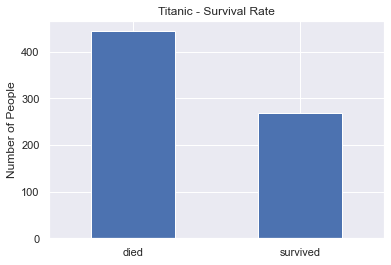

In [255]:
explore_train_df_survived.plot.bar()
plt.title('Titanic - Survival Rate')
plt.xticks( rotation='horizontal')
plt.ylabel('Number of People')
plt.show()

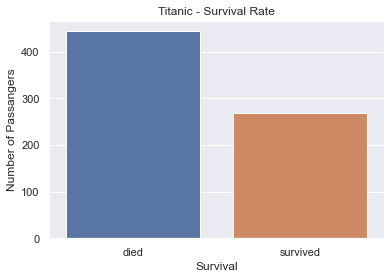

In [256]:
sns.countplot(x = 'Survived', data = explore_train_df)
plt.title('Titanic - Survival Rate')
plt.xticks([0,1], ['died', 'survived'])
plt.ylabel('Number of Passangers')
plt.xlabel('Survival')
plt.show()

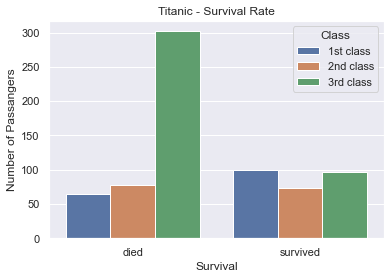

In [257]:
sns.countplot(x = 'Survived', 
              hue = 'Pclass', 
              data = explore_train_df)
plt.title('Titanic - Survival Rate')
plt.xticks([0,1], ['died', 'survived'])
plt.ylabel('Number of Passangers')
plt.xlabel('Survival')
plt.legend(title='Class', 
           loc='upper right', 
           labels=['1st class', '2nd class', '3rd class'])
plt.show()

## Step 3
### Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers

In [258]:
number_of_first_class = len(explore_train_df[explore_train_df.Pclass == 1])
number_of_first_class_survived = len(explore_train_df[(explore_train_df.Pclass == 1) & (explore_train_df.Survived == 1)])

print(f'Proportion of surviving 1st class passengers: {number_of_first_class_survived / number_of_first_class}')

Proportion of surviving 1st class passengers: 0.6073619631901841


## Step 4
### Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passergers

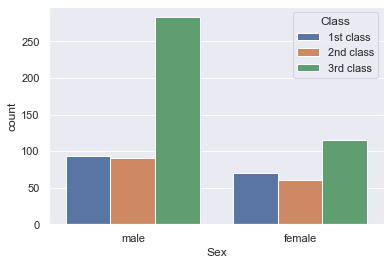

In [300]:
sns.countplot(x = 'Sex', 
              hue = 'Pclass', 
              data = explore_train_df)
plt.legend(title = 'Class', 
           labels=['1st class', '2nd class', '3rd class'])
plt.show()

## Step 5 
### Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers

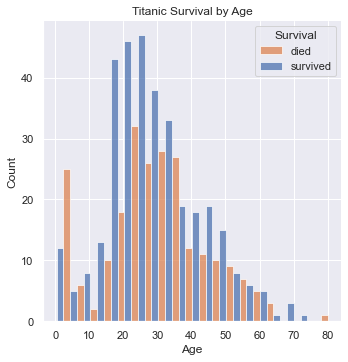

In [260]:
sns.displot(x = 'Age', 
            hue = 'Survived', 
            multiple = 'dodge',
            legend = False,
            data = explore_train_df)

plt.legend(title = 'Survival', 
           labels = ['died', 'survived'])
plt.title('Titanic Survival by Age')
plt.show()

## Step 6 
### Calculate the average age for survived and drowend passengers separatley

In [261]:
explore_train_df.groupby('Survived').Age.mean()

Survived
0    30.213235
1    28.451897
Name: Age, dtype: float64

## Step 7
### Replace missing age values by the mean age

In [263]:
# Check if there are NaN values
explore_train_df.Age.isnull().values.any()

True

In [264]:
# How many NaN values are there 
explore_train_df.Age.isnull().sum()

140

In [266]:
#train['Age'].fillna(train.groupby('Survived')['Age'].transform('mean'))
explore_train_df.Age = explore_train_df.Age.fillna(explore_train_df.groupby('Survived')['Age'].transform('mean'))

In [267]:
explore_train_df.Age.isnull().values.any()

False

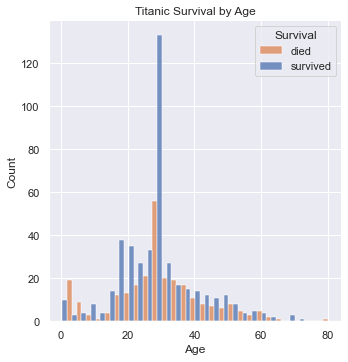

In [268]:
sns.displot(x = 'Age', 
            hue = 'Survived', 
            multiple = 'dodge',
            legend = False,
            data = explore_train_df)

plt.legend(title = 'Survival', 
           labels = ['died', 'survived'])
plt.title('Titanic Survival by Age')
plt.show()

now this looks kind of like a bad idea for our data suggesting, that the best age of survival would be the mean age ...

## Step 8
### Create a table counting the number of surviving/dead passengers separatly for 1st/2nd/3rd class and male/female

In [304]:
# g1 = df.groupby(['continent', 'population'])
# g1.mean()
explore_train_df[['Survived', 'Pclass', 'Sex', 'PassengerId']].groupby(['Survived', 'Pclass', 'Sex']).count()

PassengerId
Survived Pclass Sex                
0        1      female            3
                male             61
         2      female            2
                male             76
         3      female           59
                male            243
1        1      female           67
                male             32
         2      female           58
                male             15
         3      female           56
                male             40